# Energy Predictions Using Average temperature recorded for each day

In [341]:
# imports

import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.constraints import nonneg

In [28]:
energy = pd.read_excel('C://Users//Matthew//PycharmProjects//ISDS-7075-Project//final_project//datasets//dataset.xlsx')

In [259]:
energy = energy.iloc[0:,0:28]

energy = energy[energy.obsn != 'total']

,obsn,year,month,day,h1,h2,h3,h4,h5,h6,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
0,1,2015,1,1,66025.0,64655.0,63898.0,64078.0,65734.0,63360.0,...,50102.0,49364.0,51966.0,60480.0,64995.0,65275.0,65167.0,65055.0,65449.0,61156.0
1,2,2015,1,1,16908.0,16505.0,16572.0,16928.0,17119.0,17782.0,...,13573.0,13193.0,14185.0,16864.0,18205.0,18290.0,17980.0,16959.0,16217.0,14805.0
2,3,2015,1,1,126314.0,123368.0,119247.0,117562.0,118398.0,121283.0,...,127738.0,126884.0,135218.0,155491.0,157905.0,156895.0,153409.0,147031.0,137768.0,128078.0
3,4,2015,1,1,136288.0,133110.0,128663.0,126846.0,127747.0,130860.0,...,137825.0,136904.0,145897.0,167770.0,170376.0,169285.0,165525.0,158642.0,148647.0,138193.0
4,5,2015,1,1,539.0,512.0,505.0,503.0,499.0,545.0,...,581.0,562.0,615.0,674.0,748.0,718.0,692.0,660.0,605.0,577.0
5,6,2015,1,1,6884.0,6651.0,6580.0,6709.0,7032.0,7385.0,...,6913.0,6690.0,7275.0,8713.0,9234.0,9160.0,8826.0,8277.0,7360.0,6391.0
6,7,2015,1,1,133143.0,129964.0,125772.0,124217.0,125375.0,128613.0,...,134595.0,133520.0,142438.0,164148.0,167084.0,166000.0,162181.0,155252.0,145073.0,134415.0
7,8,2015,1,1,136288.0,133110.0,128663.0,126846.0,127747.0,130860.0,...,137825.0,136904.0,145897.0,167770.0,170376.0,169285.0,165525.0,158642.0,148647.0,138193.0
8,9,2015,1,1,3179.0,3011.0,3008.0,2969.0,3276.0,3416.0,...,3829.0,3808.0,3958.0,4403.0,4663.0,4587.0,4327.0,3959.0,3582.0,3243.0
9,10,2015,1,1,75298.0,67423.0,64105.0,63916.0,75907.0,80044.0,...,65722.0,65680.0,64987.0,66184.0,65176.0,64966.0,64966.0,65407.0,73660.0,76537.0


In [239]:
temps = pd.read_excel(r"C:\Users\Matthew\PycharmProjects\ISDS-7075-Project\final_project\datasets\dataset.xlsx",
                      sheet_name="temperature_history")

Returning the average temperatures for each day for each hour

In [240]:


def avg(column_index, dataframe):
    data_you_want = dataframe.iloc[:,column_index]
    daily_averages = list()

    #creates array for u wind values
    for i,d in enumerate(data_you_want):
        if (i % 9) == 0:
            avg_for_day = np.mean(data_you_want[i - 9:i])
            daily_averages.append(avg_for_day)
            
    return daily_averages





In [241]:
# Calling function and recreating dataframe to just contain average temperatures for each hour of each day
h1 = avg(5, temps)
h2 = avg(6, temps)
h3 = avg(7, temps)
h4 = avg(8, temps)
h5 = avg(9, temps)
h6 = avg(10, temps)
h7 = avg(11, temps)
h8 = avg(12, temps)
h9 = avg(13, temps)
h10 = avg(14, temps)
h11 = avg(15, temps)
h12 = avg(16, temps)
h13 = avg(17, temps)
h14 = avg(18, temps)
h15 = avg(19, temps)
h16 = avg(20, temps)
h17 = avg(21, temps)
h18 = avg(22, temps)
h19 = avg(23, temps)
h20 = avg(24, temps)
h21 = avg(25, temps)
h22 = avg(26, temps)
h23 = avg(27, temps)
h24 = avg(28, temps)




d = {'h1': h1, 'h2': h2, 'h3': h3, 'h4': h4, 'h5': h5, 'h6': h6, 'h7': h7, 'h8': h8,
    'h9': h9, 'h10': h10, 'h11': h11, 'h12': h12, 'h13': h13, 'h14': h14, 'h15': h15, 'h16': h16,
    'h17': h17, 'h18': h18, 'h19': h19, 'h20': h20, 'h21': h21, 'h22': h22, 'h23': h23, 'h24': h24}

df = pd.DataFrame(data=d)    


# df.to_excel('average_temps.xlsx')

I went in and put in the predicted temps into the same file in a new sheet; we will run the same function to return the averages 


In [244]:
# temp_pred = pd.read_excel(r"C:\Users\Matthew\PycharmProjects\ISDS-7075-Project\final_project\predictive_models\average_temps.xlsx",
#                       sheet_name="temp_predictions")

In [245]:
h1 = avg(1, temp_pred)
h2 = avg(2, temp_pred)
h3 = avg(3, temp_pred)
h4 = avg(4, temp_pred)
h5 = avg(5, temp_pred)
h6 = avg(6, temp_pred)
h7 = avg(7, temp_pred)
h8 = avg(8, temp_pred)
h9 = avg(9, temp_pred)
h10 = avg(10, temp_pred)
h11 = avg(11, temp_pred)
h12 = avg(12, temp_pred)
h13 = avg(13, temp_pred)
h14 = avg(14, temp_pred)
h15 = avg(15, temp_pred)
h16 = avg(16, temp_pred)
h17 = avg(17, temp_pred)
h18 = avg(18, temp_pred)
h19 = avg(19, temp_pred)
h20 = avg(20, temp_pred)
h21 = avg(21, temp_pred)
h22 = avg(22, temp_pred)
h23 = avg(23, temp_pred)
h24 = avg(24, temp_pred)



d = {'h1': h1, 'h2': h2, 'h3': h3, 'h4': h4, 'h5': h5, 'h6': h6, 'h7': h7, 'h8': h8,
    'h9': h9, 'h10': h10, 'h11': h11, 'h12': h12, 'h13': h13, 'h14': h14, 'h15': h15, 'h16': h16,
    'h17': h17, 'h18': h18, 'h19': h19, 'h20': h20, 'h21': h21, 'h22': h22, 'h23': h23, 'h24': h24}

df_new = pd.DataFrame(data=d)    

# df_new.to_excel('average_temp_pred.xlsx')



Manually reinserted these averages into the average_temps.xlsx file

In [270]:
# Created a date column in Excel
avg_temps = pd.read_excel('average_temps.xlsx', sheet_name='Sheet1')


In [271]:
# Creating a date field
energy["date"] = pd.to_datetime(energy[["year", "month", "day"]], format='%Y-%m-%d', errors='coerce')

# energy.info()


# Leap year values are causing problems.... manually replacing
# temps["date"].fillna('2015-02-29', inplace=True)


train_dates = energy["date"]
# print(train_dates.info())

Joining the average temperatures with the energy based on date 

In [273]:
merged = energy.merge(right=avg_temps, how='outer', left_on='date', right_on='date')

merged.info(verbose=True)


# merged.to_csv('merged(1).csv')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24632 entries, 0 to 24631
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   obsn        24630 non-null  object        
 1   year        24630 non-null  float64       
 2   month       24630 non-null  float64       
 3   day         24630 non-null  float64       
 4   h1_x        23685 non-null  float64       
 5   h2_x        23685 non-null  float64       
 6   h3_x        23685 non-null  float64       
 7   h4_x        23685 non-null  float64       
 8   h5_x        23685 non-null  float64       
 9   h6_x        23685 non-null  float64       
 10  h7_x        23685 non-null  float64       
 11  h8_x        23685 non-null  float64       
 12  h9_x        23685 non-null  float64       
 13  h10_x       23685 non-null  float64       
 14  h11_x       23685 non-null  float64       
 15  h12_x       23685 non-null  float64       
 16  h13_x       23685 non-

In [281]:
merged = pd.read_csv('merged(1).csv')
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24602 entries, 0 to 24601
Data columns (total 55 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  24602 non-null  int64  
 1   obsn          24600 non-null  float64
 2   year          24600 non-null  float64
 3   month         24600 non-null  float64
 4   day           24600 non-null  float64
 5   h1_x          23655 non-null  float64
 6   h2_x          23655 non-null  float64
 7   h3_x          23655 non-null  float64
 8   h4_x          23655 non-null  float64
 9   h5_x          23655 non-null  float64
 10  h6_x          23655 non-null  float64
 11  h7_x          23655 non-null  float64
 12  h8_x          23655 non-null  float64
 13  h9_x          23655 non-null  float64
 14  h10_x         23655 non-null  float64
 15  h11_x         23655 non-null  float64
 16  h12_x         23655 non-null  float64
 17  h13_x         23655 non-null  float64
 18  h14_x         23655 non-nu

In [282]:
# cols = list(merged)[5:28, 46:69]

cols = list(merged.loc[:, ~merged.columns.isin(['Unnamed: 0', 'date'])])
cols = list(cols)[5:70]

# print(cols)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6898 entries, 0 to 6897
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   h1_x    6793 non-null   float64
 1   h2_x    6793 non-null   float64
 2   h3_x    6793 non-null   float64
 3   h4_x    6793 non-null   float64
 4   h5_x    6793 non-null   float64
 5   h6_x    6793 non-null   float64
 6   h7_x    6793 non-null   float64
 7   h8_x    6793 non-null   float64
 8   h9_x    6793 non-null   float64
 9   h10_x   6793 non-null   float64
 10  h11_x   6793 non-null   float64
 11  h12_x   6793 non-null   float64
 12  h13_x   6793 non-null   float64
 13  h14_x   6793 non-null   float64
 14  h15_x   6793 non-null   float64
 15  h16_x   6793 non-null   float64
 16  h17_x   6793 non-null   float64
 17  h18_x   6793 non-null   float64
 18  h19_x   6793 non-null   float64
 19  h20_x   6793 non-null   float64
 20  h21_x   6793 non-null   float64
 21  h22_x   6793 non-null   float64
 22  

In [ ]:
df_for_training = merged.loc[0:6897,cols].astype(float)
df_for_training.info()

Use h1_y to predict h1_x, etc.



In [283]:
# LTSM uses sigmoid and tanh that are sensitive to magnitude, so values need to be normalized
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [284]:
trainX = []
trainY = []


n_future = 7
n_past = 21



for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

In [345]:
# define Autoencoder model

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 21, 64)            28928     
                                                                 
 lstm_41 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_20 (Dropout)        (None, 32)                0         
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 41,377
Trainable params: 41,377
Non-trainable params: 0
_________________________________________________________________


In [346]:
# fit model
history = model.fit(x=trainX, y=trainY, epochs=10, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/10
400/400 [==============================] - 8s 14ms/step - loss: 0.5519 - val_loss: nan
Epoch 2/10
400/400 [==============================] - 5s 13ms/step - loss: 0.0783 - val_loss: nan
Epoch 3/10
400/400 [==============================] - 5s 13ms/step - loss: 0.0569 - val_loss: nan
Epoch 4/10
400/400 [==============================] - 5s 13ms/step - loss: 0.0511 - val_loss: nan
Epoch 5/10
400/400 [==============================] - 5s 13ms/step - loss: 0.0448 - val_loss: nan
Epoch 6/10
400/400 [==============================] - 5s 13ms/step - loss: 0.0420 - val_loss: nan
Epoch 7/10
400/400 [==============================] - 5s 13ms/step - loss: 0.0396 - val_loss: nan
Epoch 8/10
400/400 [==============================] - 5s 13ms/step - loss: 0.0373 - val_loss: nan
Epoch 9/10
400/400 [==============================] - 5s 13ms/step - loss: 0.0387 - val_loss: nan
Epoch 10/10
400/400 [==============================] - 5s 13ms/step - loss: 0.0335 - val_loss: nan


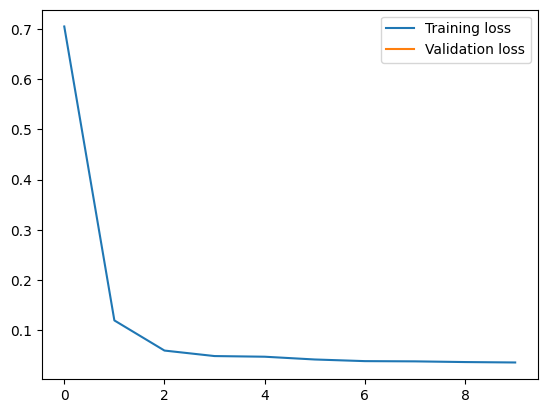

In [287]:
# plotting training/validation loss

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [297]:
# Forecasting
# start with the last day in training set and predict future
n_future = 105
forecast_period_dates = pd.date_range(list(train_dates)[-1], periods=n_future, freq='1d').tolist()

forecast = model.predict(trainX[-n_future:])

4/4 [==============================] - 0s 3ms/step


In [298]:
# Perform inverse transformation to rescale back to original range

forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis=-1)
h1_future = scaler.inverse_transform(forecast_copies)[:,0]


print(h1_future)    

[ 18086.717   17390.002   52660.4     16192.11   127218.91   133839.17
   4054.716    5335.677  135524.97   133797.95     5115.5127  68570.195
  24168.72    69784.13    80995.55    17801.768   17308.326   50439.773
  15717.407  114957.91   123403.82     3493.4426   5250.919  127017.54
 124231.9      4681.376   68028.516   23085.014   68070.85    79516.02
  18017.611   16982.693   50134.43    16386.701  119634.92   129181.83
   4206.04     7536.712  130761.56   127188.63     5997.372   68797.63
  24244.865   69301.81    80981.625   18153.506   16419.33    50494.87
  16111.724  114050.14   120854.445    3685.759    5636.8057 124248.734
 123795.65     5617.8135  67690.85    22937.686   68393.414   81448.17
  18087.459   16049.821   49191.86    15539.552  117208.12   125630.19
   3758.7083   5217.4814 126580.25   127514.766    5712.9893  67462.414
  22072.666   70359.13    84689.46    17592.94    16633.807   52294.902
  15779.892  130121.87   137617.36     4191.6455   6211.6377 139162.64
 

In [299]:
def energy_predictions(x_var_index):
    return scaler.inverse_transform(forecast_copies)[:,x_var_index].tolist()

In [301]:

h1 = energy_predictions(0)
h2 = energy_predictions(1)
h3 = energy_predictions(2)
h4 = energy_predictions(3)
h5 = energy_predictions(4)
h6 = energy_predictions(5)
h7 = energy_predictions(6)
h8 = energy_predictions(7)
h9 = energy_predictions(8)
h10 = energy_predictions(9)
h11 = energy_predictions(10)
h12 = energy_predictions(11)
h13 = energy_predictions(12)
h14 = energy_predictions(13)
h15 = energy_predictions(14)
h16 = energy_predictions(15)
h17 = energy_predictions(16)
h18 = energy_predictions(17)
h19 = energy_predictions(18)
h20 = energy_predictions(19)
h21 = energy_predictions(20)
h22 = energy_predictions(21)
h23 = energy_predictions(22)
h24 = energy_predictions(23)
# date = energy.loc[6881:6992,'date']



d = {'h1': h1, 'h2': h2, 'h3': h3, 'h4': h4, 'h5': h5, 'h6': h6, 'h7': h7, 'h8': h8,
    'h9': h9, 'h10': h10, 'h11': h11, 'h12': h12, 'h13': h13, 'h14': h14, 'h15': h15, 'h16': h16,
    'h17': h17, 'h18': h18, 'h19': h19, 'h20': h20, 'h21': h21, 'h22': h22, 'h23': h23, 'h24': h24}

df = pd.DataFrame(data=d)



print(df)


df.to_excel('energy_naive_predictions.xlsx')

                h1             h2             h3             h4  \
0     18086.716797   17126.949219   16647.992188   16439.269531   
1     17390.001953   16443.644531   15969.129883   15756.200195   
2     52660.398438   51035.140625   50335.808594   50335.757812   
3     16192.110352   15268.813477   14801.934570   14581.774414   
4    127218.906250  124158.523438  122983.953125  123433.898438   
..             ...            ...            ...            ...   
100    5311.930664    4598.059082    4200.528320    3914.703613   
101   69056.039062   67115.195312   66311.359375   66410.265625   
102   24128.130859   23052.074219   22534.609375   22362.351562   
103   70026.101562   68066.585938   67256.570312   67361.328125   
104   81820.343750   79633.804688   78748.609375   78924.554688   

                h5             h6             h7             h8  \
0     16648.701172   17002.140625   18651.191406   19748.337891   
1     15946.331055   16251.902344   17822.566406   18876.7675

Do the same thing to make predictions for June 20-26